# Simple Quantum Harmonic Oscillator in QuTiP

**Objective:**
Simulate a harmonic oscillator, display eigen-values and eigenvectors, calculate and plot the time evolution by solding the differential equations numerically

In [66]:
# from qutip.ipynbtools import version_table; version_table()
from qutip import basis, expect, Qobj, sigmax, sigmaz, sigmay, identity
from qutip import create, destroy
from qutip import mesolve, Options
from math import pi, sqrt, exp
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display, display_latex

# Define constants
hbar = 1.0  # reduced Planck's constant [a.u.] 
w = 2.0 * pi  # Frequency of the harmonic oscillator [Rad/s]
m = 1.0     # Mass of the harmonic oscillator [a.u.]

The Harmonic Oscillator's Hamiltonian can be written with Dirac's method by using the ladder operators:

$$ H = \hbar \omega ( a^\dag a + \frac{1}{2} )$$

where $a$ and $a^\dag$ are the ladder operators.
N = $a^\dag a$ is the number operator and it maps the eigenvalues and eigenvectors in order {0, 1, 2, 3, ...}
by using the properties of the Number operator we can obtain the ladder op eigenvalues

$a$ and $a^\dag$ are defined by : 

* $ a\ket{n} = \sqrt{n} \ket{n-1}$

* $ a^\dag\ket{n} = \sqrt{n+1} \ket{n+1}$


$a \ket{0} = 0$

$a \ket{1} = \ket{0} $

$a^\dag \ket{0} = \ket{1}$

$a^\dag \ket{1} = \sqrt{2}\ket{2} $



In [67]:
n = 2  # Number of states in the Hilbert space

a = destroy(n)   # Creation operator

display(a, a.dag())

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dia, isherm=False
Qobj data =
[[0. 1.]
 [0. 0.]]

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dia, isherm=False
Qobj data =
[[0. 0.]
 [1. 0.]]

In [68]:
N = a.dag() * a  # Number operator

display(N)

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dia, isherm=True
Qobj data =
[[0. 0.]
 [0. 1.]]

In [93]:
# hamiltonian of the harmonic oscillator
H = hbar * w * (N + 0.5 * identity(n))

display(H)

# Define the initial state (ground state of the harmonic oscillator)
psi0 = basis(n, 0)  # Ground state |0>

display(psi0)

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dia, isherm=True
Qobj data =
[[3.14159265 0.        ]
 [0.         9.42477796]]

Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]]

c:\Users\yehan\Documents\Programming\Quantum-Simulations\.venv\Lib\site-packages\qutip\solver\options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


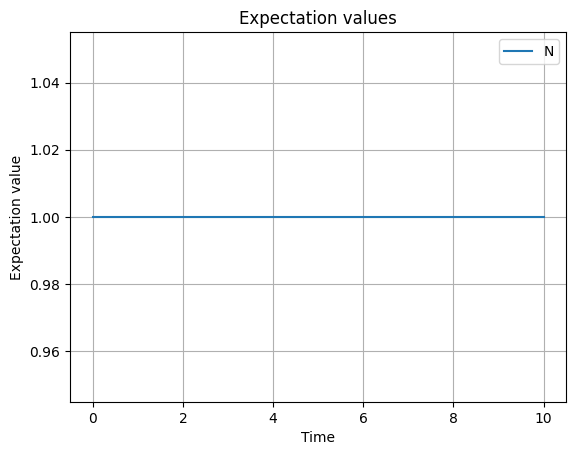

In [121]:
tlist = np.linspace(0, 10, 100)  # Time list for the simulation

# solve the time-dependent Schrödinger equation using mesolve
output = mesolve(H, psi0, tlist, e_ops=[sigmaz()], options=Options(nsteps=1000))

plt.title("Expectation values")
plt.plot(tlist, output.expect[0], label="N")
plt.xlabel("Time")
plt.ylabel("Expectation value")
plt.legend()
plt.grid()
plt.show()